## Problem Statement
Import the the Haberman Dataset and name the columns 
['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_5yr'] 

Task:
Do univariant,Bi variant and multivariate analysis and Draw the conclusion based on that.

Help taken from  : Solution file provided by Decoder. 
                    & towardsdatascience website.

### 1. Importing libraries

In [33]:
import numpy as np # numerical/mathematical 
import pandas as pd # data manipulation/processing
import matplotlib.pyplot as plt # visualisation/graphs
import seaborn as sns# beautification of graphs
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

### 2. Importing dataset
Data provided by Decodr Technologies for data visualisation assignment on 10th October.

In [125]:
haber=pd.read_csv("haberman.csv",names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_5yr'])

### 3. Initial Analysis

In [5]:
haber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   306 non-null    int64
 1   year_of_treatment     306 non-null    int64
 2   positive_lymph_nodes  306 non-null    int64
 3   survival_5yr          306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
haber.head()

,age,year_of_treatment,positive_lymph_nodes,survival_5yr
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
haber.shape

(306, 4)

In [9]:
haber.isnull().sum()

age                     0
year_of_treatment       0
positive_lymph_nodes    0
survival_5yr            0
dtype: int64

### 4. Data Understanding
Dataset information:
    
    The dataset contains 306 observations and 4 features and has no null values

    Attribute Information:
    Age of patient at the time of operation (numerical)
    Patient’s year of operation (year — 1900, numerical)
    Number of positive lymph nodes detected (numerical)
    Survival status (class attribute) :
        1 = the patient survived 5 years or longer
        2 = the patient died within 5 years
    
    All the columns are of the integer data type.
    The datatype of the survival_5yr is an integer, it has to be converted to a categorical datatype

In [12]:
#Feature survival_yr changed to categorical datatype
haber['survival_5yr'] = haber['survival_5yr'].map({1:'Yes', 2:'No'})

In [13]:
haber.head()

,age,year_of_treatment,positive_lymph_nodes,survival_5yr
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [14]:
haber.dtypes

age                      int64
year_of_treatment        int64
positive_lymph_nodes     int64
survival_5yr            object
dtype: object

In [17]:
haber['survival_5yr'].value_counts()

Yes    225
No      81
Name: survival_5yr, dtype: int64

### 5. Statistical data understanding
    

In [16]:
haber.describe(include='all')

,age,year_of_treatment,positive_lymph_nodes,survival_5yr
count,306.000000,306.000000,306.000000,306
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,Yes
freq,NaN,NaN,NaN,225
mean,52.457516,62.852941,4.026144,NaN
std,10.803452,3.249405,7.189654,NaN
min,30.000000,58.000000,0.000000,NaN
25%,44.000000,60.000000,0.000000,NaN
50%,52.000000,63.000000,1.000000,NaN
75%,60.750000,65.750000,4.000000,NaN


###  General Observation
    The various parameters such as mean median and respective percentiles       depicted. Variance between mean and median, greater in the           positive_lymph_nodes feature.
    The frequency and the value_counts above, reflect 225 out of 306 with positive survival rate.

#### 5.1 Statistical observation for  Survivors and Nonsurvivors beyond 5 years

In [20]:
survival_5yr_yes = haber[haber['survival_5yr']=='Yes']
survival_5yr_yes.describe()

,age,year_of_treatment,positive_lymph_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [21]:
survival_5yr_yes = haber[haber['survival_5yr']=='No']
survival_5yr_yes.describe()

,age,year_of_treatment,positive_lymph_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


## Class wise ,general observation
    1.The mean of age and the year in which the patients got operated are almost similar of both the classes,
    2.The mean of the nodes of both the classes differs by 5 units approximately.
    3.The values of positive_lymph_nodes of patients who survived are less when compared to patients who did not survive.

## 6.Datavisualisation


#### 6.1 Univariate Analysis

#### Objective to find patterns in a single feature

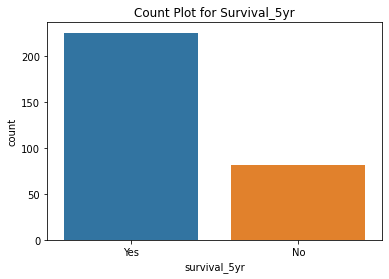

In [30]:
sns.countplot(x = haber['survival_5yr']).set_title('Count Plot for Survival_5yr') # again, shows us that we have imbalanced dataset
plt.show()

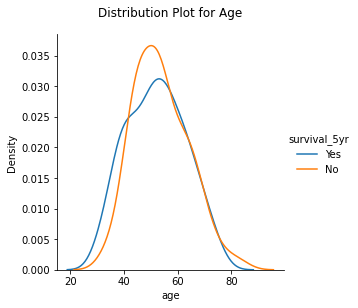

In [35]:
sns.FacetGrid(haber, hue = 'survival_5yr', height = 4, ) \
    .map(sns.distplot, "age",hist=False) \
    .add_legend() \
    .set_axis_labels("age", "Density")
plt.title('Distribution Plot for Age', y=1.05, fontsize = 12)
plt.show()

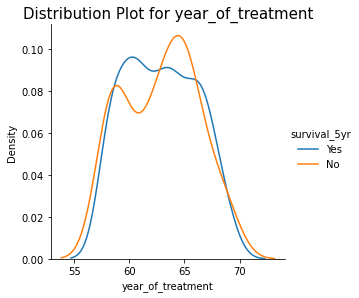

In [43]:
sns.FacetGrid(haber, hue = 'survival_5yr', height = 4, ) \
    .map(sns.distplot, "year_of_treatment",hist=False) \
    .add_legend() \
    .set_axis_labels("year_of_treatment", "Density")
plt.title('Distribution Plot for year_of_treatment', y=1, fontsize = 15)
plt.show()

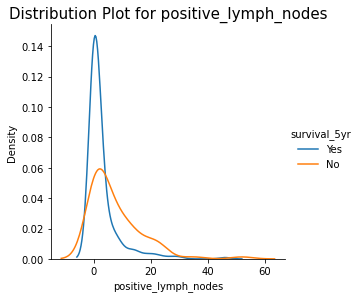

In [45]:
sns.FacetGrid(haber, hue = 'survival_5yr', height = 4, ) \
    .map(sns.distplot, "positive_lymph_nodes",hist=False) \
    .add_legend() \
    .set_axis_labels("positive_lymph_nodes", "Density")
plt.title('Distribution Plot for positive_lymph_nodes', y=1, fontsize = 15)
plt.show()

#### Inference univariate analysis
    #The graphs are overlapping at most points
    #No clear decision boundaries between the features.   

#### 6.2 Bivariate analysis- Scatterplot, boxplot, violinplot

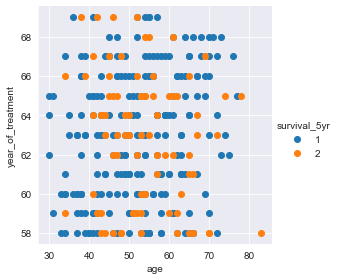

In [142]:
sns.set_style('darkgrid')
sns.FacetGrid(haber, hue = 'survival_5yr' , height = 4)\
 .map(plt.scatter,'age','year_of_treatment')\
 .add_legend()
plt.show()

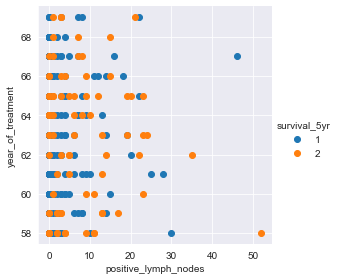

In [131]:
sns.set_style('darkgrid')
sns.FacetGrid(haber, hue = 'survival_5yr' , height = 4)\
 .map(plt.scatter,'positive_lymph_nodes','year_of_treatment')\
 .add_legend()
plt.show()

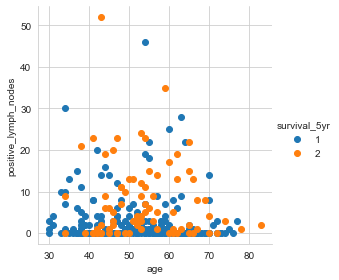

In [130]:
sns.set_style('whitegrid')
sns.FacetGrid(haber, hue = 'survival_5yr' , height = 4)\
 .map(plt.scatter,'age','positive_lymph_nodes')\
 .add_legend()
plt.show()

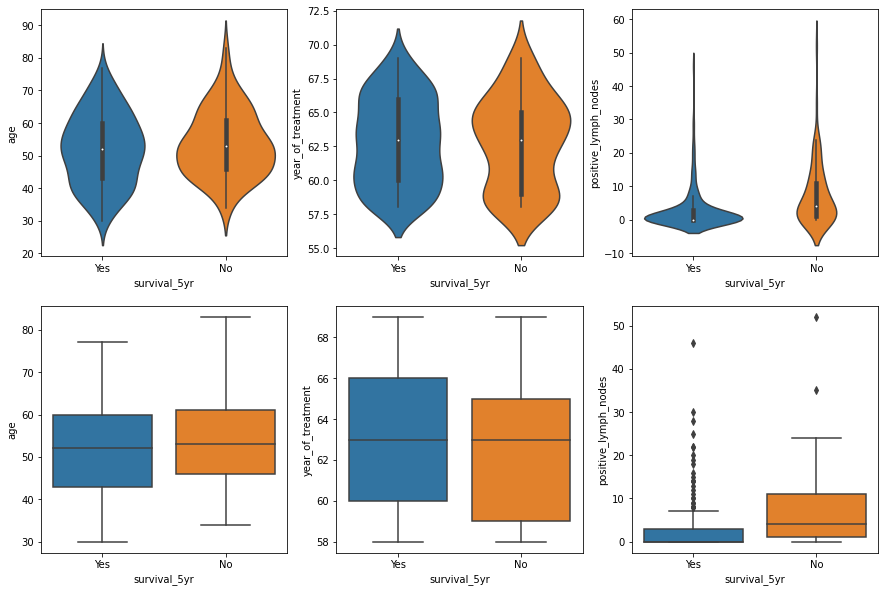

In [85]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
sns.violinplot(x='survival_5yr',y='age',data = haber,ax=ax[0,0],height = 10)
sns.violinplot(x='survival_5yr',y='year_of_treatment',data = haber,ax=ax[0,1],height = 10)
sns.violinplot(x='survival_5yr',y='positive_lymph_nodes',data = haber,ax=ax[0,2],height = 10)
sns.boxplot(x='survival_5yr',y='age',data = haber,ax=ax[1,0])
sns.boxplot(x='survival_5yr',y='year_of_treatment',data = haber,ax=ax[1,1])
sns.boxplot(x='survival_5yr',y='positive_lymph_nodes',data = haber,ax=ax[1,2])
plt.show()

### Inference of bivariate analysis
No clear decision boundaries between compared variables.

#### 6.3  Multivariate analysis - Pairplot, heatmap

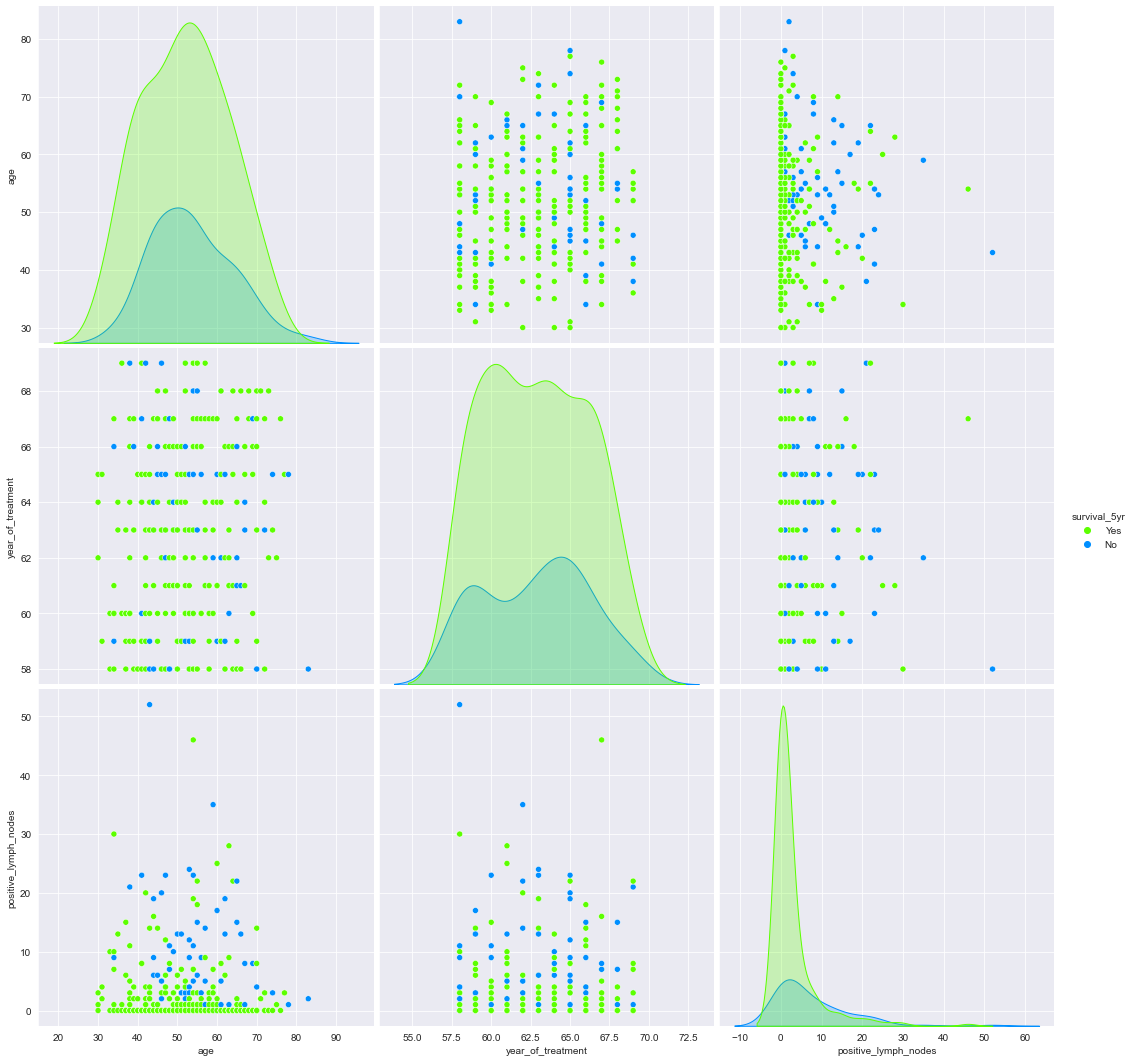

In [113]:
figsize=(26,26)
sns.set_style('darkgrid')
sns.pairplot(haber, hue='survival_5yr', height = 5,palette='gist_rainbow')
plt.show()

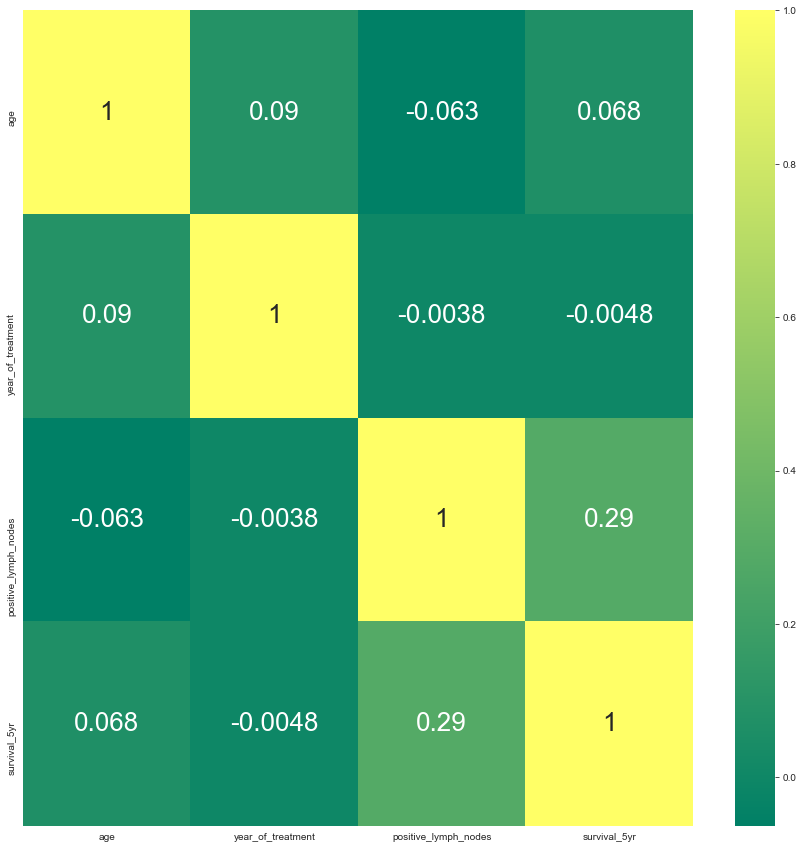

In [141]:
plt.figure(figsize=(15,15))
chaber=haber.corr()
sns.heatmap(data=chaber,annot=True,cmap='summer',annot_kws={"size": 26},)
plt.show()

#### Inference
The highest correlation value is between positive lymph node and survival 5 yr
However the correlation intensity value is low at 0.29 only. The next best set of parameters that show correlation are age and year of  operation at 0.09
The features cannot be deduced as a sole  determining factor of survival beyond 5 years.

## 7.Conclusion

    a)Age:
    1.Survival chances are irrespective of age.
    2.Yet, people less than 45 years have more chance of survival.

    b}Positive_lymph_nodes:
    1.Survival chance is inversely proportional to the number of positive axillary nodes. 
    2.There are very few datapoints at high node levels For eg : 25 and above.
    3.Patients with less than around 3 positive lymph node are comparitively more likely to survive
    4.We also saw that the absence of positive axillary nodes cannot always guarantee survival.

    c)Year of operation:
    1.Unsuccessful operations are at a high between 1963 to 1966 years. 
    2.The graph plots peak values in that range for nonsurvivors.


    1.Major overlapping is witnessed in the charts.
    2. Existing features are not helping us to linearly separate/define boundaries for the data.
    3.Patient’s age and operation year alone are not deciding factors for his/her survival.
    4.One feature from which we can draw most inference is positive_lymph_node, 
    5.The overlap in the box plot and the violin plot of positive_lymph_node is less compared to other features but the overlap still exists and thus it is difficult to define a boundary, to classify both classes of survivors.
    6.Not much can be inferred based on the present data ,with data visualisation tools alone.